## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [0.01]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.8 ,0.9, 0.95 ,1]
NETSTEROV = True

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    for mmt in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉

        print("Experiment with LR = %.6f" % (lr))
        exp_name_tag = "exp-lr-{}-mmt-{}".format(str(lr),str(mmt))
        print(">>> ", str(exp_name_tag))

        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=NETSTEROV, momentum=mmt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


>>>  exp-lr-0.01-mmt-0.7
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.8998 - acc: 0.3195 - val_loss: 1.8079 - val_acc: 0.3521
Epoch 2/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.7047 - acc: 0.3950 - val_loss: 1.6720 - val_acc: 0.4108
Epoch 3/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.6276 - acc: 0.4239 - val_loss: 1.6008 - val_acc: 0.4345
Epoch 4/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.5673 - acc: 0.4454 - val_loss: 1.5876 - val_acc: 0.4352
Epoch 5/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.5256 - acc: 0.4610 - val_loss: 1.5870 - val_acc: 0.4393
Epoch 6/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.4804 - acc: 0.4766 - val_loss: 1.5308 - val_acc: 0.4521
Epoch 7/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.4471 - acc: 0.4890 - val_loss: 1.

50000/50000 [==============================] - 15s 305us/step - loss: 1.8671 - acc: 0.3297 - val_loss: 1.9345 - val_acc: 0.3156
Epoch 2/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.6538 - acc: 0.4146 - val_loss: 1.6078 - val_acc: 0.4316
Epoch 3/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.5644 - acc: 0.4457 - val_loss: 1.5826 - val_acc: 0.4287
Epoch 4/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5012 - acc: 0.4663 - val_loss: 1.6404 - val_acc: 0.4091
Epoch 5/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.4507 - acc: 0.4843 - val_loss: 1.5733 - val_acc: 0.4477
Epoch 6/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.4100 - acc: 0.5012 - val_loss: 1.4924 - val_acc: 0.4704
Epoch 7/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.3700 - acc: 0.5153 - val_loss: 1.4695 - val_acc: 0.4814
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 14s 283us/step - loss: 1.8320 - acc: 0.3462 - val_loss: 1.6537 - val_acc: 0.4151
Epoch 2/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.5960 - acc: 0.4361 - val_loss: 1.6275 - val_acc: 0.4189
Epoch 3/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5078 - acc: 0.4623 - val_loss: 1.5464 - val_acc: 0.4476
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.4476 - acc: 0.4848 - val_loss: 1.4962 - val_acc: 0.4713
Epoch 5/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.3983 - acc: 0.5026 - val_loss: 1.4396 - val_acc: 0.4906
Epoch 6/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.3577 - acc: 0.5171 - val_loss: 1.3975 - val_acc: 0.5028
Epoch 7/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.3181 - acc: 0.5319 - val_loss: 1.4579 - val_acc: 0.4827
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 14s 284us/step - loss: 1.8514 - acc: 0.3325 - val_loss: 1.6982 - val_acc: 0.3984 - loss: 1.8518 - acc: 0.332
Epoch 2/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.6841 - acc: 0.4062 - val_loss: 1.6710 - val_acc: 0.4028
Epoch 3/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.6895 - acc: 0.3998 - val_loss: 1.7102 - val_acc: 0.3931
Epoch 4/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.7253 - acc: 0.3855 - val_loss: 1.7390 - val_acc: 0.3807
Epoch 5/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.7574 - acc: 0.3681 - val_loss: 1.9095 - val_acc: 0.3267
Epoch 6/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.8012 - acc: 0.3504 - val_loss: 1.8795 - val_acc: 0.2992
Epoch 7/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.8486 - acc: 0.3127 - val_loss: 1.9200 - val_acc: 0.2624
Epoch 8/50

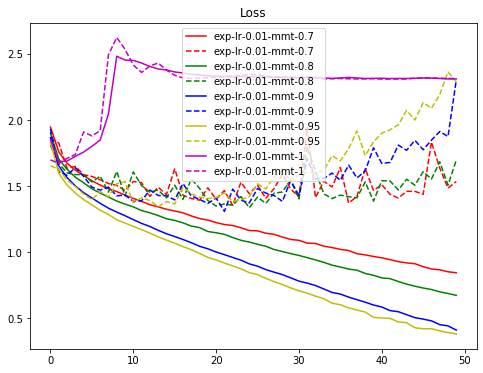

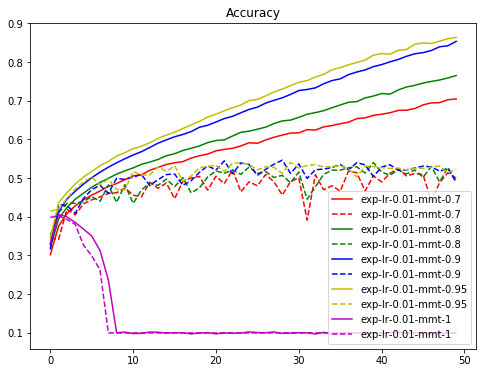

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "o"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()